In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from keras.preprocessing.image import img_to_array
from tqdm import tqdm
import os
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [2]:
dataset = []
labels = []
test_dataset=[]

In [3]:
def prepare_Images(label,path):
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img_res=cv2.resize(img,(50,50))
    img_array = img_to_array(img_res)
    img_array = img_array/255
    dataset.append(img_array)
    labels.append(label)

In [4]:
def prepare_test_image(path):
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img_res=cv2.resize(img,(50,50))
    img_array = img_to_array(img_res)
    img_array = img_array/255
    test_dataset.append(img_array)
    

In [5]:
train_Data = pd.read_csv("aptos2019-blindness-detection/train.csv")


In [6]:
train_Data.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [7]:
test_Data = pd.read_csv("aptos2019-blindness-detection/test.csv")



In [8]:
test_Data.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


In [9]:
id_code_Data = train_Data['id_code']
diagnosis_Data = train_Data['diagnosis']
id_code_test_Data = test_Data['id_code']

In [10]:
for id_code,diagnosis in tqdm(zip(id_code_Data,diagnosis_Data)):
    path = os.path.join('aptos2019-blindness-detection/train_images','{}.png'.format(id_code))
    prepare_Images(diagnosis,path)

3662it [04:47, 12.73it/s]


In [11]:
for id_code_test in id_code_test_Data:
    test_Data_path = os.path.join('aptos2019-blindness-detection/test_images','{}.png'.format(id_code_test))
    prepare_test_image(test_Data_path)

In [12]:
images = np.array(dataset)
label_arr = np.array(labels)
test_images = np.array(test_dataset)

In [13]:
images.shape

(3662, 50, 50, 3)

In [14]:
label_arr.shape

(3662,)

In [15]:
test_images.shape

(1928, 50, 50, 3)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_validation,y_train,y_validation = train_test_split(images,label_arr,test_size=0.20,random_state=42)

In [17]:
x_train.shape

(2929, 50, 50, 3)

In [18]:
x_validation.shape

(733, 50, 50, 3)

In [19]:
y_train.shape

(2929,)

In [20]:
y_validation.shape

(733,)

In [21]:
y_train[:5]

array([0, 0, 0, 3, 0])

In [22]:
classes = ["No","mild","moderate","severe","proliferative"]

In [23]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

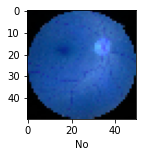

In [24]:
plot_sample(x_train, y_train, 0)

In [ ]:
#x_train = x_train / 255.0
#x_test = x_test / 255.0

In [ ]:
'''data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(50, 
                                                              50,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)'''

In [25]:
'''cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(50, 50, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history1 = cnn.fit(x_train, y_train, batch_size=64,epochs=30,validation_data=(x_validation,y_validation))
              '''
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
history1 = model.fit(x_train, y_train, batch_size=32,epochs=30,validation_data=(x_validation,y_validation))
#history1=model.fit(x_train,y_train,epochs=30,batch_size=32)

Epoch 1/30
92/92 [==============================] - 5s 52ms/step - loss: 0.9912 - accuracy: 0.6340 - val_loss: 0.8439 - val_accuracy: 0.7135
Epoch 2/30
92/92 [==============================] - 4s 47ms/step - loss: 0.8009 - accuracy: 0.7030 - val_loss: 0.7879 - val_accuracy: 0.7190
Epoch 3/30
92/92 [==============================] - 5s 51ms/step - loss: 0.7574 - accuracy: 0.7214 - val_loss: 0.8046 - val_accuracy: 0.7176
Epoch 4/30
92/92 [==============================] - 4s 48ms/step - loss: 0.7237 - accuracy: 0.7347 - val_loss: 0.7459 - val_accuracy: 0.7340
Epoch 5/30
92/92 [==============================] - 4s 47ms/step - loss: 0.7052 - accuracy: 0.7381 - val_loss: 0.7608 - val_accuracy: 0.7408
Epoch 6/30
92/92 [==============================] - 5s 52ms/step - loss: 0.6967 - accuracy: 0.7443 - val_loss: 0.7554 - val_accuracy: 0.7299
Epoch 7/30
92/92 [==============================] - 5s 51ms/step - loss: 0.6782 - accuracy: 0.7491 - val_loss: 0.7198 - val_accuracy: 0.7326
Epoch 8/30
92

In [26]:
model.evaluate(x_validation,y_validation)

23/23 [==============================] - 0s 11ms/step - loss: 1.3380 - accuracy: 0.7258


[1.3379966020584106, 0.725784420967102]

In [27]:
y_pred = model.predict(x_validation)


In [28]:
y_pred[:5]

array([[ 15.885863  ,   0.47975847, -13.854062  ,  -1.4199772 ,
         -4.2586617 ],
       [  6.3374777 ,  -4.0654054 ,   9.525668  , -10.89474   ,
          2.3582366 ],
       [  4.9994073 ,  -5.0905323 ,  -1.5629793 ,   0.6018785 ,
          3.092346  ],
       [ -2.4606063 ,   3.3797245 ,   4.983767  ,   1.0675197 ,
          2.4896681 ],
       [  9.697857  ,   1.2940162 ,   0.83685315,  -7.171608  ,
         -1.3056467 ]], dtype=float32)

In [29]:
y_classes = [np.argmax(element) for element in y_pred]


In [30]:
y_classes[:10]

[0, 2, 0, 2, 0, 0, 0, 2, 2, 4]

In [31]:
y_validation[:10]

array([0, 1, 3, 4, 0, 0, 0, 4, 2, 2])

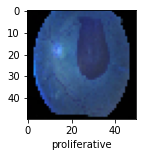

In [32]:
plot_sample(x_validation, y_validation,3)

In [33]:
classes[y_classes[3]]

'moderate'

In [ ]:
classes[y_classes[0]]

In [ ]:
classes[y_classes[1]]

In [34]:
y_test_predict =  model.predict(test_images)
y_test_classes = [np.argmax(element) for element in y_test_predict]

In [ ]:
y_test_classes[60:70]

'moderate'

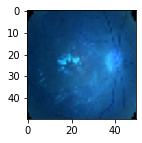

In [36]:
plt.figure(figsize=(15,2))
plt.imshow(test_images[1])
classes[y_test_classes[1]]

In [37]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(x_validation)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_validation, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       351
           1       0.53      0.43      0.47        68
           2       0.59      0.73      0.65       213
           3       0.27      0.11      0.16        36
           4       0.30      0.17      0.22        65

    accuracy                           0.73       733
   macro avg       0.52      0.48      0.49       733
weighted avg       0.70      0.73      0.71       733



In [38]:
conMat = confusion_matrix(y_validation,y_pred_classes)
print(conMat)

[[332   4  15   0   0]
 [  6  29  30   2   1]
 [ 15  14 156   7  21]
 [  2   3  23   4   4]
 [  7   5  40   2  11]]


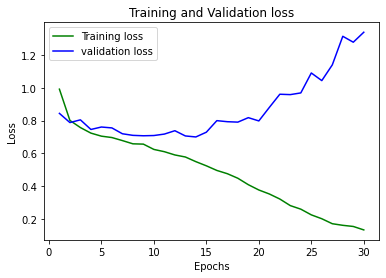

In [39]:
loss_train = history1.history['loss']
loss_val = history1.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

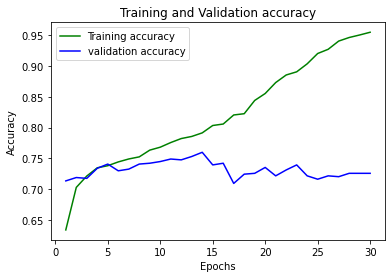

In [40]:
loss_train = history1.history['accuracy']
loss_val = history1.history['val_accuracy']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.layers import Dense, Flatten

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(50,50,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(10, activation='softmax'))

resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#resnet_model.compile(optimizer=Adam,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

resnet_model.summary()

history2 = resnet_model.fit(x_train, y_train, batch_size=64,epochs=10,validation_data=(x_validation,y_validation))
'''

In [ ]:
'''from keras import layers
from keras import models


model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (50,50,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(100,activation = 'relu'))
model.add(layers.Dense(10, activation= 'softmax')) 

model.summary()

model.compile(optimizer = 'sgd',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs=15, batch_size = 64,validation_data=(x_validation,y_validation))'''


In [ ]:
'''model3 = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(
         128,
         activation = 'relu'
     ),
     tf.keras.layers.Dense(
         64,
         activation = 'relu'
     ),
     tf.keras.layers.Dense(
         32,
         activation = 'relu'
     ),
     tf.keras.layers.Dense(
         10,
         activation = 'softmax'
     )
    ]
)

model3.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',#sgd
    metrics = ['accuracy']
)

my_model = model3.fit(
    x_train,
    y_train,
    epochs = 15
)'''

In [ ]:
'''data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(50, 
                                                              50,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)'''

In [ ]:
'''augmentation = tf.keras.Sequential([
    layers.RandomFlip(mode='horizontal_and_vertical'),
    layers.RandomRotation(factor=0.2),
    layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    layers.RandomTranslation(height_factor=0.2, width_factor=0.2)
])'''

In [ ]:
'''num_classes = 5

model5 = Sequential([
 augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model5.fit(x_train, y_train, epochs=30)   '''